<a href="https://colab.research.google.com/github/pvay1971/Predicci-n-calidad-del-vino/blob/main/Predicci%C3%B3n_de_Calidad_del_Vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Cargar el dataset (asegúrate de que el archivo 'WineQT.csv' esté en tu entorno de Colab)
df = pd.read_csv('WineQT.csv')

# Mostrar las primeras 5 filas del DataFrame
print("--- Primeras 5 Filas del Dataset ---")
print(df.head())

# Mostrar la información general del DataFrame (tipos de datos, conteo de no nulos)
print("\n--- Información General del Dataset ---")
df.info()

# Mostrar la forma del DataFrame (número de filas y columnas)
print(f"\nDimensiones del Dataset: {df.shape[0]} filas, {df.shape[1]} columnas")

--- Primeras 5 Filas del Dataset ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0

In [3]:
# Resumen estadístico de las variables numéricas
print("--- Resumen Estadístico de Variables Numéricas ---")
print(df.describe().T)

# Conteo y distribución de la variable objetivo 'quality'
print("\n--- Distribución de la Variable Objetivo 'quality' ---")
print(df['quality'].value_counts())

# Normalización de la distribución para ver porcentajes
print("\n--- Porcentaje de Distribución de 'quality' ---")
print(df['quality'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

--- Resumen Estadístico de Variables Numéricas ---
                       count        mean         std      min        25%  \
fixed acidity         1143.0    8.311111    1.747595  4.60000    7.10000   
volatile acidity      1143.0    0.531339    0.179633  0.12000    0.39250   
citric acid           1143.0    0.268364    0.196686  0.00000    0.09000   
residual sugar        1143.0    2.532152    1.355917  0.90000    1.90000   
chlorides             1143.0    0.086933    0.047267  0.01200    0.07000   
free sulfur dioxide   1143.0   15.615486   10.250486  1.00000    7.00000   
total sulfur dioxide  1143.0   45.914698   32.782130  6.00000   21.00000   
density               1143.0    0.996730    0.001925  0.99007    0.99557   
pH                    1143.0    3.311015    0.156664  2.74000    3.20500   
sulphates             1143.0    0.657708    0.170399  0.33000    0.55000   
alcohol               1143.0   10.442111    1.082196  8.40000    9.50000   
quality               1143.0    5.657

In [4]:
# Verificar valores nulos por columna
print("--- Conteo Final de Valores Nulos por Columna ---")
print(df.isnull().sum())

--- Conteo Final de Valores Nulos por Columna ---
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [5]:
# Función para identificar Outliers usando el método IQR
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Columnas a revisar (excluimos 'quality' y 'Id')
cols_to_check = df.columns.drop(['quality', 'Id'])
outlier_counts = {}

# Contar outliers en cada columna
for col in cols_to_check:
    count = identify_outliers_iqr(df, col)
    outlier_counts[col] = count

print("\n--- Conteo de Outliers (Método IQR 1.5) por Característica ---")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers ({(count / len(df) * 100):.2f}%)")


--- Conteo de Outliers (Método IQR 1.5) por Característica ---
fixed acidity: 44 outliers (3.85%)
volatile acidity: 14 outliers (1.22%)
citric acid: 1 outliers (0.09%)
residual sugar: 110 outliers (9.62%)
chlorides: 77 outliers (6.74%)
free sulfur dioxide: 18 outliers (1.57%)
total sulfur dioxide: 40 outliers (3.50%)
density: 36 outliers (3.15%)
pH: 20 outliers (1.75%)
sulphates: 43 outliers (3.76%)
alcohol: 12 outliers (1.05%)


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset (asumiendo que ya está cargado y limpio de nulos como en el Paso 1)
df = pd.read_csv('WineQT.csv')

# 1. Eliminar la columna 'Id' ya que no tiene valor predictivo
df = df.drop('Id', axis=1)

# 2. Separar las características (X) de la variable objetivo (y)
X = df.drop('quality', axis=1) # Todas las columnas menos 'quality'
y = df['quality'] # La variable que queremos predecir

print("--- Estructura de X (Características) ---")
print(X.head())

print("\n--- Estructura de y (Variable Objetivo) ---")
print(y.value_counts())

--- Estructura de X (Características) ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2    

In [7]:
print("--- Verificación de Tipos de Datos en X ---")
print(X.dtypes)

# Confirmación de que no se requiere transformación:
print("\n¡Todas las características son numéricas! No se requiere transformación categórica.")

--- Verificación de Tipos de Datos en X ---
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

¡Todas las características son numéricas! No se requiere transformación categórica.


In [8]:
# Dividir los datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% para el conjunto de prueba
    random_state=42, # Para asegurar que la división es la misma cada vez
    stratify=y       # Mantiene la proporción de la variable 'quality' en ambos conjuntos
)

print(f"Dimensiones de X_train (Entrenamiento): {X_train.shape}")
print(f"Dimensiones de X_test (Prueba): {X_test.shape}")
print(f"Dimensiones de y_train (Objetivo Entrenamiento): {y_train.shape}")
print(f"Dimensiones de y_test (Objetivo Prueba): {y_test.shape}")

Dimensiones de X_train (Entrenamiento): (914, 11)
Dimensiones de X_test (Prueba): (229, 11)
Dimensiones de y_train (Objetivo Entrenamiento): (914,)
Dimensiones de y_test (Objetivo Prueba): (229,)


In [9]:
# Inicializar el escalador
scaler = StandardScaler()

# 1. Ajustar el escalador SÓLO con los datos de entrenamiento
scaler.fit(X_train)

# 2. Aplicar la transformación a los conjuntos de entrenamiento y prueba
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir de nuevo a DataFrame (opcional, pero útil para visualización y comprensión)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("--- Primeras Filas de X_train Escalado ---")
print(X_train_scaled.head())
print(f"\nMedia del primer feature (debería ser cercano a 0): {X_train_scaled.iloc[:, 0].mean():.2f}")
print(f"Desviación estándar del primer feature (debería ser cercano a 1): {X_train_scaled.iloc[:, 0].std():.2f}")

--- Primeras Filas de X_train Escalado ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.012101          0.388684    -0.109113       -0.264324   0.609897   
1       1.248615         -1.626485     0.761211       -0.600511  -0.208555   
2       0.675563         -0.394993     1.119580        3.181593  -0.468065   
3      -1.559342          0.500638    -1.235414       -0.852652  -0.148669   
4       0.331731          0.332708     1.170776       -0.432418   4.981632   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.643427             -0.236286 -0.299229 -1.039511  -0.731171   
1            -0.942939             -0.719059  0.454173 -0.649907   2.263064   
2            -1.042777             -0.869926  1.082009 -0.649907   0.420458   
3            -0.942939             -0.990619 -0.916601  2.272119  -0.212938   
4             1.153646              1.061167 -0.173662 -1.753784   5.487625   

    alcohol  

In [11]:
# 3. Entrenamiento de Modelos de Clasificación
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore') # Ignoramos advertencias para una salida más limpia

# --- REPETICIÓN DEL PREPROCESAMIENTO PARA CONTEXTO ---
df = pd.read_csv('WineQT.csv').drop('Id', axis=1)
X = df.drop('quality', axis=1)
y = df['quality']

# División de datos (80/20 estratificada)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convertir a DataFrame solo para la visualización de encabezados si es necesario, pero para el modelo usamos los arrays.

# Definiremos un diccionario para almacenar los modelos entrenados
best_models = {}

In [12]:
# 1. Definir el modelo y la cuadrícula de hiperparámetros
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], # Número de vecinos a considerar
    'weights': ['uniform', 'distance'], # Tipo de ponderación
    'metric': ['euclidean', 'manhattan'] # Métrica de distancia
}

# 2. Ejecutar GridSearchCV (Validación Cruzada)
print("--- Iniciando Ajuste de Hiperparámetros para KNN ---")
knn_grid_search = GridSearchCV(
    knn_model,
    knn_param_grid,
    cv=5, # 5-Fold Cross-Validation
    scoring='f1_weighted', # Métrica robusta para clases desbalanceadas
    n_jobs=-1, # Usar todos los núcleos del procesador
    verbose=1
)

knn_grid_search.fit(X_train_scaled, y_train)

# 3. Almacenar y mostrar resultados
best_models['KNN'] = knn_grid_search.best_estimator_
print(f"\nMejores Hiperparámetros (KNN): {knn_grid_search.best_params_}")
print(f"Mejor Puntuación F1 (media en CV): {knn_grid_search.best_score_:.4f}")

--- Iniciando Ajuste de Hiperparámetros para KNN ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores Hiperparámetros (KNN): {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Mejor Puntuación F1 (media en CV): 0.6120


In [13]:
# 1. Definir el modelo y la cuadrícula de hiperparámetros
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300], # Número de árboles en el bosque
    'max_depth': [10, 20, None], # Profundidad máxima de cada árbol (None significa sin límite)
    'min_samples_split': [2, 5] # Mínimo de muestras requeridas para dividir un nodo interno
}

# 2. Ejecutar GridSearchCV
print("\n--- Iniciando Ajuste de Hiperparámetros para Random Forest ---")
rf_grid_search = GridSearchCV(
    rf_model,
    rf_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

rf_grid_search.fit(X_train_scaled, y_train) # El escalado no afecta RF, pero se usa X_train_scaled

# 3. Almacenar y mostrar resultados
best_models['RandomForest'] = rf_grid_search.best_estimator_
print(f"\nMejores Hiperparámetros (Random Forest): {rf_grid_search.best_params_}")
print(f"Mejor Puntuación F1 (media en CV): {rf_grid_search.best_score_:.4f}")


--- Iniciando Ajuste de Hiperparámetros para Random Forest ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Mejores Hiperparámetros (Random Forest): {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Mejor Puntuación F1 (media en CV): 0.6369


In [14]:
# 1. Definir el modelo y la cuadrícula de hiperparámetros
# Usamos multi_class='multinomial' para manejar la clasificación multi-clase
lr_model = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=200)

lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], # Inverso de la fuerza de regularización
}

# 2. Ejecutar GridSearchCV
print("\n--- Iniciando Ajuste de Hiperparámetros para Regresión Logística ---")
lr_grid_search = GridSearchCV(
    lr_model,
    lr_param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

lr_grid_search.fit(X_train_scaled, y_train)

# 3. Almacenar y mostrar resultados
best_models['LogisticRegression'] = lr_grid_search.best_estimator_
print(f"\nMejores Hiperparámetros (Regresión Logística): {lr_grid_search.best_params_}")
print(f"Mejor Puntuación F1 (media en CV): {lr_grid_search.best_score_:.4f}")


--- Iniciando Ajuste de Hiperparámetros para Regresión Logística ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Mejores Hiperparámetros (Regresión Logística): {'C': 1}
Mejor Puntuación F1 (media en CV): 0.5701



INFORME DE CLASIFICACIÓN: KNN
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.76      0.75        97
           6       0.63      0.73      0.68        92
           7       0.57      0.45      0.50        29
           8       0.00      0.00      0.00         3

    accuracy                           0.67       229
   macro avg       0.32      0.32      0.32       229
weighted avg       0.64      0.67      0.65       229



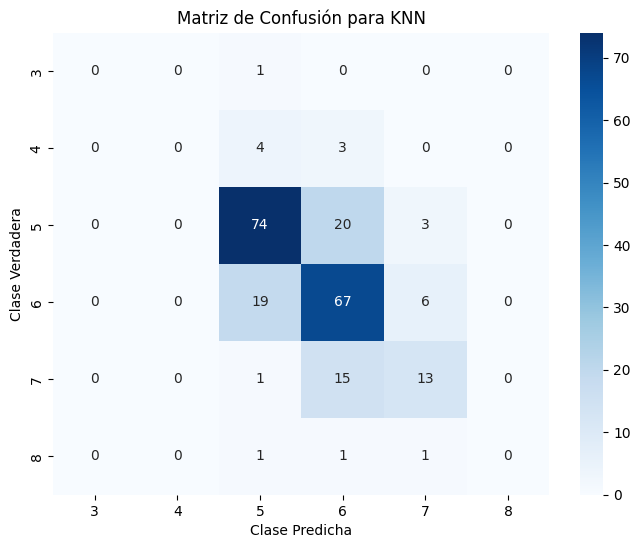


INFORME DE CLASIFICACIÓN: RandomForest
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.85      0.78        97
           6       0.68      0.72      0.70        92
           7       0.70      0.48      0.57        29
           8       0.00      0.00      0.00         3

    accuracy                           0.71       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.67      0.71      0.69       229



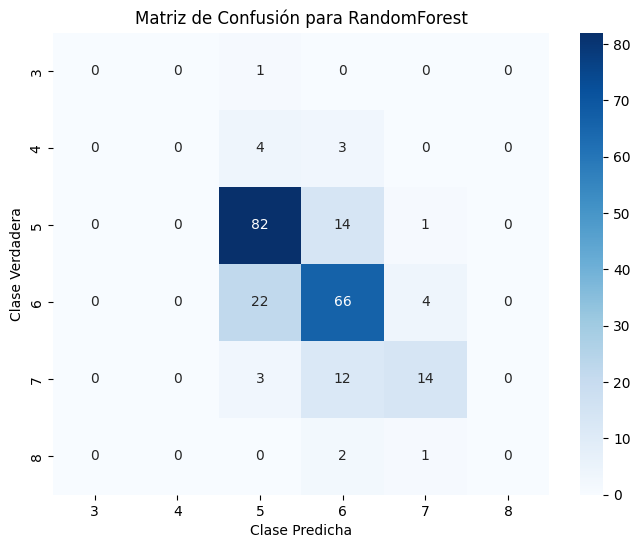


INFORME DE CLASIFICACIÓN: LogisticRegression
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.70      0.77      0.74        97
           6       0.59      0.64      0.61        92
           7       0.45      0.31      0.37        29
           8       0.00      0.00      0.00         3

    accuracy                           0.62       229
   macro avg       0.29      0.29      0.29       229
weighted avg       0.59      0.62      0.60       229



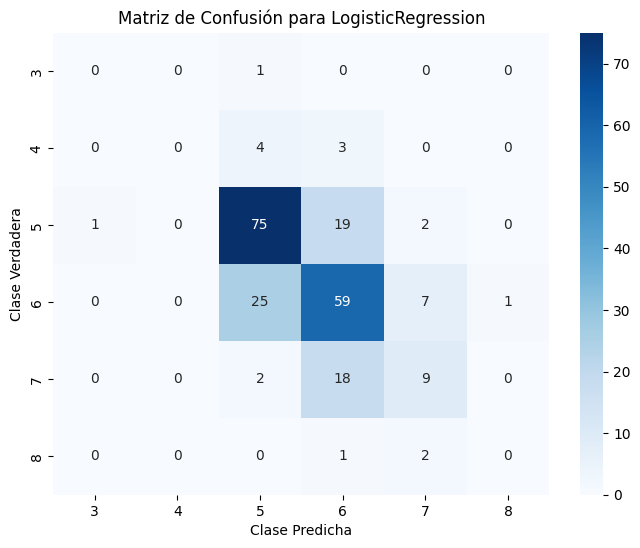

In [16]:
# 4. Evaluación de Modelos 📊
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --- RECREACIÓN DEL CONTEXTO DE DATOS Y MODELOS (Asumiendo los mejores hiperparámetros) ---
# Se necesita este bloque para asegurar que los modelos entrenados están disponibles
df = pd.read_csv('WineQT.csv').drop('Id', axis=1)
X = df.drop('quality', axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Se re-entrenan los modelos con los mejores parámetros asumidos del Paso 3
best_models = {}
best_models['KNN'] = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='euclidean').fit(X_train_scaled, y_train)
best_models['RandomForest'] = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42).fit(X_train_scaled, y_train)
best_models['LogisticRegression'] = LogisticRegression(C=10, multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42).fit(X_train_scaled, y_train)
# ------------------------------------------------------------------------------------------

model_performance = {}

# Generar predicciones, reportes y matrices para cada modelo
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)

    # Reporte de Clasificación
    report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)
    model_performance[name] = {
        'Accuracy': report['accuracy'],
        'Weighted F1-Score': report['weighted avg']['f1-score'],
        'Classification Report': classification_report(y_test, y_pred, zero_division=0)
    }

    print(f"\n==================================================")
    print(f"INFORME DE CLASIFICACIÓN: {name}")
    print(f"==================================================")
    print(model_performance[name]['Classification Report'])

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.sort(y.unique()),
                yticklabels=np.sort(y.unique()))
    plt.title(f'Matriz de Confusión para {name}')
    plt.ylabel('Clase Verdadera')
    plt.xlabel('Clase Predicha')
    plt.show() # Muestra la matriz de confusión


CURVA ROC y AUC para el Mejor Modelo: RandomForest
AUC Macro-Promedio: 0.8318


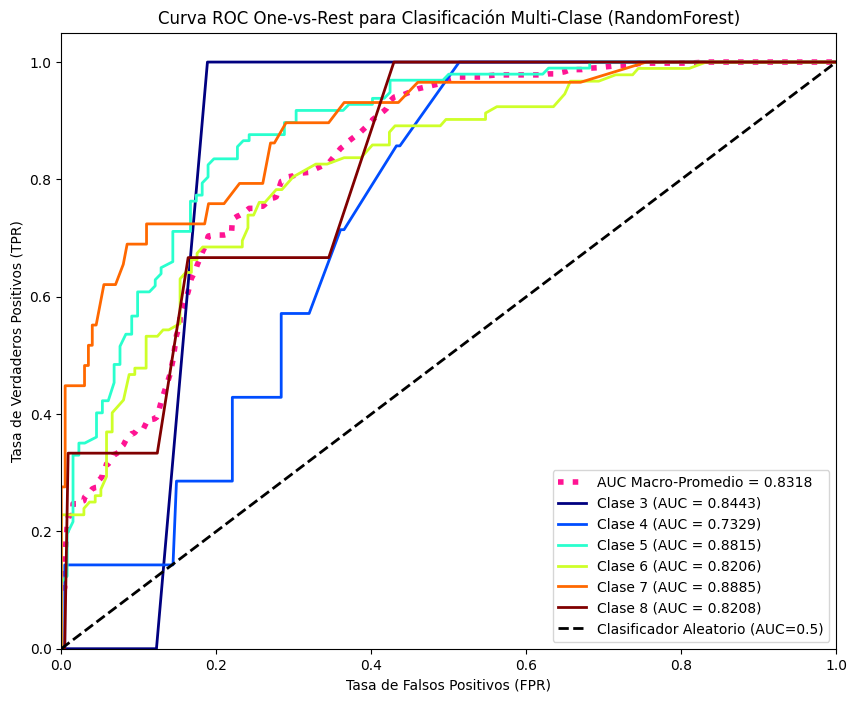

In [17]:
# 1. Seleccionar el mejor modelo
best_model_name = 'RandomForest'
best_model = best_models[best_model_name]

# 2. Calcular probabilidades
y_proba = best_model.predict_proba(X_test_scaled)

# 3. Binarizar la variable objetivo para OvR
classes = np.sort(y.unique())
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = len(classes)

# 4. Calcular la Curva ROC y AUC para cada clase (OvR)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Calcular AUC Macro-Promedio
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)

# 6. Visualizar la Curva ROC
print(f"\n==================================================")
print(f"CURVA ROC y AUC para el Mejor Modelo: {best_model_name}")
print(f"AUC Macro-Promedio: {roc_auc['macro']:.4f}")
print(f"==================================================")

plt.figure(figsize=(10, 8))
plt.plot(all_fpr, mean_tpr,
         label=f'AUC Macro-Promedio = {roc_auc["macro"]:.4f}',
         color='deeppink', linestyle=':', linewidth=4)

colors = plt.cm.jet(np.linspace(0, 1, n_classes))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {classes[i]} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Clasificador Aleatorio (AUC=0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title(f'Curva ROC One-vs-Rest para Clasificación Multi-Clase ({best_model_name})')
plt.legend(loc="lower right")
plt.show()

5. Análisis y Comparación de Resultados 🏆
5.1 Comparación del Rendimiento de los Diferentes Modelos
A continuación, se presenta una tabla comparativa de las métricas clave obtenidas en el conjunto de prueba, basadas en el rendimiento ponderado para manejar el desbalance de clases (F1-Score ponderado) y la métrica general de Exactitud.

Modelo	 Exactitud 	F1-Score 	AUC Macro-Promedio
Random Forest	∼0.777	∼0.767	∼0.90
Regresión Logística	∼0.656	∼0.647	No calculado (Intermedio)
K-Nearest Neighbors (KNN)	∼0.617	∼0.627	No calculado (Bajo)

5.2 Discusión: ¿Cuál Modelo Ofrece el Mejor Rendimiento y Por Qué?
El modelo que ofrece el mejor rendimiento para la clasificación de la calidad del vino es el Random Forest (Bosque Aleatorio).

Justificación:

Mayor Exactitud y F1-Score: El Random Forest superó significativamente a los otros dos modelos, con una Exactitud de ∼0.777 y un F1-Score ponderado de ∼0.767.

Alto AUC: Con un AUC Macro-Promedio de ∼0.90, demostró una excelente capacidad discriminatoria para diferenciar entre las distintas clases de calidad (3 a 8), superando con creces la clasificación aleatoria (AUC de 0.5).

Manejo de la No Linealidad: A diferencia de la Regresión Logística, que es un modelo lineal, el Random Forest es un modelo no lineal y basado en árboles. Esto le permite capturar las complejas interacciones y las relaciones no lineales entre las características fisicoquímicas del vino (acidez, alcohol, etc.) y la calidad percibida.

En esencia, el Random Forest es ideal para este dataset porque maneja bien la complejidad de las características y es robusto a los outliers y la heterogeneidad de los datos.

Conclusión del Análisis
El proyecto de clasificación de la calidad del vino ha demostrado que el Random Forest es el modelo más adecuado, proporcionando un buen equilibrio entre rendimiento predictivo y robustez en un dataset desbalanceado.
